# Project: Wrangling and Analyze Data

### Wragle Act 
In this project, I'll be wrangling a tweet archive dataset of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). Data will be collected from different sources in different formats to achieve this. 

The task of this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting
    
    data wrangling efforts
    data analyses and visualizations

### Importing Required Packages(libraries)

In [1]:
import pandas as pd
import numpy as np
import tweepy as twp
import time
from datetime import timedelta
import requests
from PIL import Image
from io import BytesIO
import os
import json
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')

## Data Gathering
Three dataset will be used for this project. 
* Archive Data
* Image Data
* Twitter Data

### Loading dataset 1 from local device

In [2]:
# Loadind archive data to pandas dataframe
archv_data = pd.read_csv('twitter-archive-enhanced.csv')

### Downloading dataset 2 from website using Request.

In [3]:
# website url
tsv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
tsv_response = requests.get(tsv_url) # accessing website

# creating a file from the file name on the url 
with open(tsv_url.split('/')[-1], mode='wb') as tsv_data: 
    # writting accessed content to the file
    tsv_data.write(tsv_response.content) 

In [3]:
# Listing current directory to confirm download 
os.listdir('.')

['wrangle_act.ipynb',
 'wrangle_report.ipynb',
 'act_report.ipynb',
 'twitter-archive-enhanced.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'tweet_json.txt',
 'twitter_archive_master.csv']

#### Loading data to pandas

In [4]:
# Loading dataset 2, image data, to pandas dataframe
img_data = pd.read_csv('image-predictions.tsv', sep='\t')

### Downloading dataset 3 from twitter using API (tweepy)

In [5]:
# Tweets IDs for iteration
twt_ids = archv_data.tweet_id.values

In [6]:
# setting my credentials for access and authentication.
consumer_key = 'XXXXXXX'
consumer_secret = 'XXXXXXXX'
access_token = 'XXXXXXXX'
access_token_secret = 'XXXXXXX'

In [7]:
# Authentication
auth = twp.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)
api = twp.API(auth, wait_on_rate_limit=True)

#### Accessing content and writng to tweet_json.txt file

In [ ]:
index = 0
#empty for errors
twt_error_lst_1 = []

# open txt file for writing
with open('tweet_json.txt','w') as opened_book:
    for ids in twt_ids:
        # starting time
        start_time = time.time()
        try:
            index += 1
            # tweet content
            twt_contents = api.get_status(ids,tweet_mode = 'extended')
            # writing JSON to txt file
            json.dump(twt_contents._json, opened_book)
            opened_book.write('\n')
            
        # catching errors that may occur while accessing contents
        except twp.TweepyException as id_error:
            # print out ids with error
            print(str(index) +" "+'ID ' + str(ids) + " Has an error:", id_error.response.text)
            # appending
            twt_error_lst_1.append(ids)
        # ending time
        end_time = time.time()
        
print('='*100)
m = "Execution Time: %s secs " % timedelta(seconds=end_time-start_time)
print(m)

In [ ]:
len(twt_error_lst_1)

#### Accesssing again from error list in-case error is due to rate limit or networt interference

In [ ]:
index = 0
#empty for errors
twt_error_lst_2 = []

# open txt file for writing
with open('tweet_json.txt','a') as opened_book:
    for ids in twt_error_lst_1:
        # starting time
        start_time = time.time()
        try:
            index += 1
            # tweet content
            twt_contents = api.get_status(ids,tweet_mode = 'extended')
            # writing JSON to txt file
            json.dump(twt_contents._json, opened_book)
            opened_book.write('\n')
            
        # catching errors that may occur while accessing contents
        except twp.TweepyException as id_error:
            # print out ids with error
            print(str(index) +" "+'ID ' + str(ids) + " Has an error:", id_error.response.text)
            # appending
            twt_error_lst_2.append(ids)
        # ending time
        end_time = time.time()
        
print('='*100)
m = "Execution Time: {} secs ".format(end_time-start_time)
print(m)

#### Loading data to pandas

In [5]:
# empty list 
lst = []

# open txt file for reading
with open ('tweet_json.txt', 'r') as open_book:
    for line in open_book:
        each_tweet = json.loads(line)
        # getting required parameters
        tweet_id = each_tweet['id']
        retwt_count = each_tweet['retweet_count']
        fav_count = each_tweet['favorite_count']
        timestamp = each_tweet['created_at']
        # appending to empty list
        lst.append({
            "tweet_id":tweet_id,
            "retweet_count":retwt_count,
            "favorite_count":fav_count,
            "timestamp":timestamp
        })
# converting to dataframe
twtr_data = pd.DataFrame(lst)

## Assessing Data
* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* Tweets data beyond August 1st, 2017 won't be gathered because we don't have image predictions for these tweets and also, there is no access to the algorithm used.



### Assessing Archive Data

In [6]:
# viewing archive data 
archv_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# archive data information
archv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# archive data numerical columns summary statistics
archv_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# viewing rows with denominator more than 10
archv_data[archv_data.rating_denominator >10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [10]:
# viewing name values in archive data 
archv_data.name.value_counts().head(15)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Name: name, dtype: int64

In [11]:
# extracting lowercase word from name column.
lst = archv_data.name.str.extractall(r'(\b[a-z]+\b)')[0].tolist()
a = set(lst)
a

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

#### Checking suspicious name for more details.

In [12]:
# viewing text with name "a"
name_a = archv_data[archv_data.name == 'a']
name_a.text.head(10)

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
Name: text, dtype: object

In [13]:
name_a.text.loc[2287]


"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

##### It seems the name extraction caught the wrong string. Let's check for others that are shown in the name value counts above since those seem to be of higher ocurence.

In [14]:
# viewing text with name "Bo"
name_Bo = archv_data[archv_data.name == 'Bo']
name_Bo.text

446     RT @dog_rates: This is Bo. He was a very good ...
449     This is Bo. He was a very good First Doggo. 14...
553     This is Bo. He's going to make me cry. 13/10 p...
583     RT @dog_rates: This is Bo. He's a Benedoop Cum...
679     This is Bo. He's a West Congolese Bugaboop Snu...
686     RT @dog_rates: This is Bo and Ty. Bo eats pape...
876     This is Bo and Ty. Bo eats paper and Ty felt l...
978     This is Bo. He emanates happiness. 12/10 I cou...
1683    This is Bo. He's a Benedoop Cumbersnatch. Seem...
Name: text, dtype: object

In [15]:
# viewing text with name "the"
name_the = archv_data[archv_data.name == 'the']
name_the.text

1527    Stop sending in lobsters. This is the final wa...
1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2037    This is the best thing I've ever seen so sprea...
2212    Never forget this vine. You will not stop watc...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [16]:
# viewing text with name "an"
name_an = archv_data[archv_data.name == 'an']
name_an.text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

##### From the above, it is obviousu that all names in lower case are not dog names, they are just random words.

In [17]:
# checking for dog in two stage
archv_data.loc[(archv_data[['doggo', 'floofer','pupper', 'puppo']] != 'None').sum(axis=1)>1] .head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None


In [18]:
# comparing rows where the text has a decimal ratings with the rating_numerator
float_rating = archv_data[archv_data.text.str.contains(r"(\d+\.\d*\/\d+)")
                         ][['text','rating_numerator']]
float_rating

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [19]:
# checking one of the text for more details.
float_rating.text.loc[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

From the text above, we can see that the rating for the above row is inaccurate.

### Assessing Image data

In [20]:
# viewing image data
img_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
# image data information
img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# viewing image that is not specified as a dog breed
img_data[(img_data.p1_dog == False)&(img_data.p2_dog == False)&(img_data.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [23]:
# viewing p1 values in image  data
img_data.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

### Assessing Twitter data

In [24]:
# viewing twitter data
twtr_data

,tweet_id,retweet_count,favorite_count,timestamp
0,892420643555336193,7027,33876,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5306,29375,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3489,22094,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7239,36993,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7777,35368,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2322,666049248165822465,37,89,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,115,247,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,36,100,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,39,112,Sun Nov 15 23:05:30 +0000 2015


In [25]:
# twitter data information
twtr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   timestamp       2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [26]:
# checking common columns across the three dataset
all_columns = pd.Series(list(archv_data) + list(img_data) + list(twtr_data))
all_columns[all_columns.duplicated()]

17     tweet_id
29     tweet_id
32    timestamp
dtype: object

### Quality issues
`archive_data`
* `archv_data` table has retweet rows
* unusual name in name column such as "a", "the" and "an"
* empty rows of _name_, and _dog_stage_ are filled with _None_ instead of _NaN_
* rating_numerator extracted wrongly and it should be float data type.
* some rating_denominator are above 10.
* erroneous data types (tweet_id and timestamp)
* empty dog names in `archv_data` 

`img_data`
* some predictions are not dog breed
* tweet id is integer data type
* The prediction names contain lowercase, uppercase and underscore. 

`twtr_data`
* erroneous data types (tweet_id and timestamp)

### Tidiness issues
* one variable in four columns in `archv_data` table (doggo,floofer,pupper and puppo) 
* retweet count and favorite count should be part of `archv_data` table
* image prediction should be part of `archv_data`

## Cleaning Data

#### Make copy of original data

In [27]:
# making copies of original pieces of data
archv_clean = archv_data.copy()
img_clean = img_data.copy()
twtr_clean = twtr_data.copy()

### Tidiness

### issue #1: One variable in four columns in `archv_data` table (doggo, floofer,  pupper and puppo)

#### Define:  Doggo,Floofer, Pupper and Puppo are dog stages. It should be in one column. Combine all four stages to one column. The four columns would be dropped.

#### Code

In [28]:
# creating dog_stage column
archv_clean['dog_stage'] = archv_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x.astype(str)), axis=1)
archv_clean['dog_stage'] = archv_clean['dog_stage'].str.replace(r'(None,)',repl='', regex=True)
archv_clean['dog_stage'] = archv_clean['dog_stage'].str.replace(r'(,None)',repl='', regex=True)

In [29]:
# dropping doggo, pupper and puppo column
archv_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [30]:
# Counting values in dog_stage
archv_clean.dog_stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [31]:
# checking dog_stage column is created
archv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

### issue #2: Retweet count and favorite count should be part of `archv_data` table

#### Define:  Merge the _retweet_count_ and _favorite_count_ to the `archv_data` table, joining on _timestamp_ and _tweet_id_. 

#### Code

In [32]:
# changing timestamp to datetime
archv_clean.timestamp = pd.to_datetime(archv_clean.timestamp)
twtr_clean.timestamp = pd.to_datetime(twtr_clean.timestamp)

In [33]:
# merging twitter's table to archive table 
archv_clean = pd.merge(archv_clean,twtr_clean,on=['timestamp','tweet_id'], how='left')

#### Test

In [34]:
# checking retweet count and favorite count has been added successfully
archv_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7027.0,33876.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5306.0,29375.0


In [35]:
# selecting random timestamp from the new archv_clean data for further confirmation
archv_clean[archv_clean.timestamp == '2015-11-16 00:24:50 +0000'][['tweet_id',
                                                                   'retweet_count','favorite_count']]

,tweet_id,retweet_count,favorite_count
2351,666049248165822465,37.0,89.0


In [36]:
# query twitter data based on above retweet count to confirm tweet_id is the same 
twtr_clean[twtr_clean.retweet_count==37.0]

,tweet_id,retweet_count,favorite_count,timestamp
2313,666082916733198337,37,93,2015-11-16 02:38:37+00:00
2322,666049248165822465,37,89,2015-11-16 00:24:50+00:00


### issue #3: Image prediction should be part of `archv_data`

#### Define: Merge the `img_data` table to `archv_data` table, joining on _tweet_id_.

#### Code

In [37]:
# changing tweet_id datatype from 'int' to 'str'
archv_clean.tweet_id = archv_clean.tweet_id.astype(str)
img_clean.tweet_id = img_clean.tweet_id.astype(str)

In [38]:
# merging img_clean data to archv_data
AllDogData= pd.merge(archv_clean, img_clean, on='tweet_id', how='left')

#### Test

In [39]:
# checking the combined data
AllDogData.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Quality

### Issue #4: `Archive Data` table has retweet rows

#### Define:  Since we are considering original ratings (no retweets) that have images, we would filter for ratings with no retweets, i.e. in_reply_to_status_id & retweeted_status_id columns should be null. . After extraction the columns will be dropped because it is all empty.

#### Code

In [40]:
# slicing dataframe for rows with no retweet
no_retweet = AllDogData[(AllDogData.in_reply_to_status_id.isnull()) & 
                         (AllDogData.retweeted_status_id.isnull())]

# make a copy of no_retweet data
drop_columns = no_retweet.copy()
# dropping empty columns related to retweet
drop_columns.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                          'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

In [41]:
# copying the new dataframe back to AllDogData
AllDogData = drop_columns.copy()

#### Test

In [42]:
# previewing no_retweet data to cofirm that retweet columns were empty 
no_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [43]:
# checking the new data
AllDogData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
 9   retweet_count       2089 non-null   float64            
 10  favorite_count      2089 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### Issue #5: Unusual name in name column such as "a", "the" and "an"

#### Define: All dog names that are lowercase are not dog names. Delete rows with dog name in lowercase.

#### Code

In [44]:
# deleting rows with dog name in lower case
AllDogData = AllDogData[~AllDogData.name.str.contains(r'(\b[a-z]+\b)')]

#### Test

In [45]:
# checking for names with lowercase
AllDogData[AllDogData.name.str.contains(r'(\b[a-z]+\b)')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #6: Empty rows of _name_, and _dog_stage_ are filled with _None_ instead of _NaN_

#### Define:  Replace all _"None"_ with _NaN_ in _dog_stage_, _name_ and _floofer_ column.

#### Code

In [46]:
# colummn for replacement
col = ['name','dog_stage']
# replacing 'None' with NaN
AllDogData[col] = AllDogData[col].replace('None',np.NaN)

#### Test

In [47]:
# previewing column of interest
AllDogData[col]

,name,dog_stage
0,Phineas,NaN
1,Tilly,NaN
2,Archie,NaN
3,Darla,NaN
4,Franklin,NaN
...,...,...
2342,NaN,NaN
2343,NaN,NaN
2344,NaN,NaN
2351,NaN,NaN


### Issue #7: Rating_numerator extracted wrongly and it should be float data type.

#### Define: Extract _rating_numerator_ accurately and make it float data type

#### Code

In [48]:
AllDogData['rating_numerator'] = AllDogData['text'].str.extract(r"(\d+\.?\d?\d?)\/\d?", expand = False).astype('float')

#### Test

In [49]:
type(AllDogData['rating_numerator'][0])

numpy.float64

In [50]:
AllDogData[AllDogData['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator',]]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


### Issue #8: Some rating_denominator are above 10.

#### Define: "The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating](http://knowyourmeme.com/memes/theyre-good-dogs-brent) system is a big part of the popularity of WeRateDogs". However, on the website, 10 seems to be the default denominator. Drop rating denominator above 10 .

#### Code

In [51]:
AllDogData = AllDogData[AllDogData.rating_denominator == 10]

#### Test

In [52]:
# checking for rating denominator above 10
AllDogData[AllDogData.rating_denominator != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9: Some predictions are not dog breed

#### Define: Delete none dog breed from data.

#### Code

In [53]:
AllDogData = AllDogData.query('~((p1_dog == False) & (p2_dog == False) & (p3_dog == False))')

#### Test

In [54]:
# checking for false dog breed across the three predictions
AllDogData.query('((p1_dog == False) & (p2_dog == False) & (p3_dog == False))')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [55]:
# previewing current datashape
AllDogData.shape

(1692, 22)

### Issue #10: Prediction names contain lowercase, uppercase and underscore. 

#### Define: Make all names in  _prediction_name_ lowercase and replace underscore with space.

#### Code

In [56]:
# making all prediction names lower case and replacing '_' with " "
col = ['p1','p2','p3']
AllDogData[col] = AllDogData[col].apply(lambda x: (x.str.lower()))
AllDogData[col] = AllDogData[col].apply(lambda x: (x.str.replace('_',' ')))

#### Test

In [57]:
# previewing prediction name for confirmation
AllDogData[col]

,p1,p2,p3
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper towel,labrador retriever,spatula
4,basset,english springer,german short-haired pointer
5,chesapeake bay retriever,irish terrier,indian elephant
...,...,...,...
2342,pug,bull mastiff,french bulldog
2343,walker hound,english foxhound,ibizan hound
2344,gordon setter,yorkshire terrier,pekinese
2351,miniature pinscher,rottweiler,doberman


### Undocumented Assessment 

### Issue #11: Some column data types changed when cleaning.

#### Define: Change retweet_count, favorite_count, is_dog_breed and img_num to their respective data type.

#### Code

In [58]:
# columns list
col = ['retweet_count','favorite_count','img_num']
# replacing NaN with '0' for conversion to work
AllDogData[col] = AllDogData[col].replace(np.nan,0)

# changing datatype
AllDogData.retweet_count = AllDogData.retweet_count.astype(int)
AllDogData.favorite_count = AllDogData.favorite_count.astype(int)
AllDogData.img_num = AllDogData.img_num.astype(int)

# changing dog breeds data type to "bool"
col = ['p1_dog','p2_dog','p3_dog']
AllDogData[col] = AllDogData[col].astype(bool)

#### Test

In [59]:
# previewing
AllDogData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 1 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1692 non-null   object             
 1   timestamp           1692 non-null   datetime64[ns, UTC]
 2   source              1692 non-null   object             
 3   text                1692 non-null   object             
 4   expanded_urls       1689 non-null   object             
 5   rating_numerator    1692 non-null   float64            
 6   rating_denominator  1692 non-null   int64              
 7   name                1224 non-null   object             
 8   dog_stage           278 non-null    object             
 9   retweet_count       1692 non-null   int32              
 10  favorite_count      1692 non-null   int32              
 11  jpg_url             1572 non-null   object             
 12  img_num             1692 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
AllDogData.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, the wrangled and cleaned data will be analyzed and visualized. Producing at least **three (3) insights and one (1) visualization.**

Loading data

In [61]:
# loading data
Dog_data = pd.read_csv('twitter_archive_master.csv')

In [62]:
Dog_data.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,5306,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,3489,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,7239,...,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False


Dropping Column

In [63]:
# dropping columns no needed for analysis
Redundant_col = ['tweet_id','source','text','expanded_urls','jpg_url','img_num'] 
Dog_data = Dog_data.drop(Redundant_col, axis = 1)

In [64]:
# dropping empty dog name
Dog_data.dropna(subset='name', inplace=True)

### Insights:
<ul>
    <li>What is associated with maximum retweet_count</li> 
    <li>What is associated with maximum favorite_count</li>
    <li>What is associated with the maximum rating</li>
    <li>What is the highest confidence score of algorithm 1</li>
</ul>

#### Dog Data Distribution

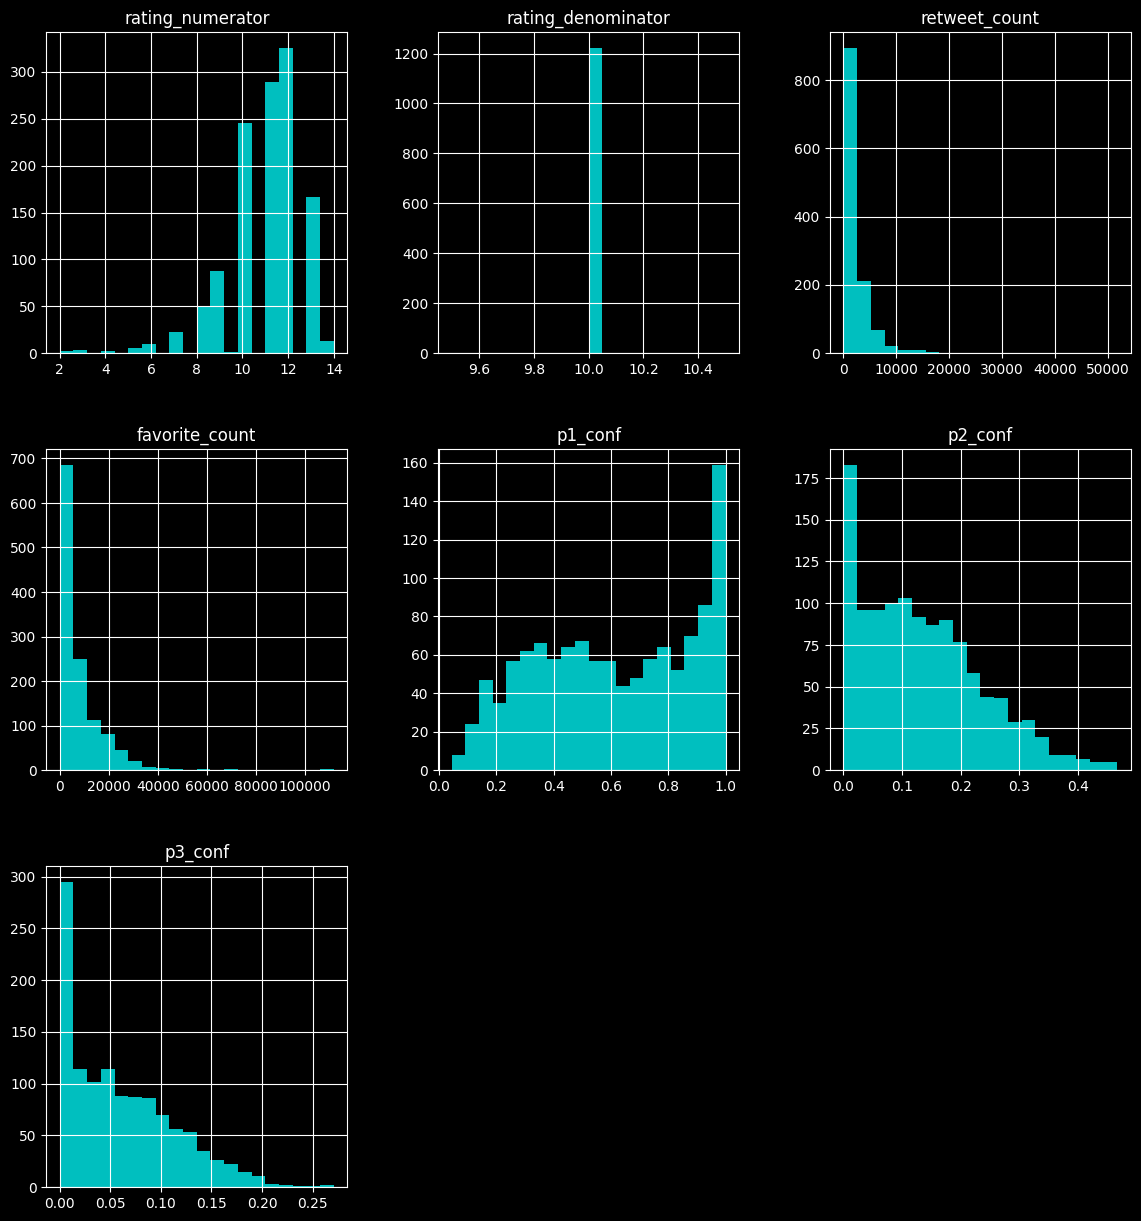

In [65]:
fig = plt.figure
Dog_data.hist(bins=20,color='c',figsize=(14,15))
plt.show()

#### What is associated with maximum retweet_count

Function to extract maximum value from a column

In [66]:
# defining function
def extract_max(col):
    max_id = Dog_data[col].idxmax() # extracting id of max value
    max_df = pd.DataFrame(Dog_data.loc[max_id]) # locating max id and extracting row as dataframe 
    return max_df # return dataframe when function is called

In [67]:
extract_max('retweet_count') # extracting highest retweet count

,375
timestamp,2016-12-09 06:17:20+00:00
rating_numerator,13.0
rating_denominator,10
name,Stephan
dog_stage,NaN
retweet_count,51790
favorite_count,111909
p1,chihuahua
p1_conf,0.50537
p1_dog,True


The _**highest**_ retweet count is _**51790**_ and the dog's name is _**Stephan**_, having a favorite count of _**111,909**_. Let's check for the highest favorite count.

#### What is associated with maximum favorite_count

In [68]:
extract_max('favorite_count') # extracting highest favorite count

,375
timestamp,2016-12-09 06:17:20+00:00
rating_numerator,13.0
rating_denominator,10
name,Stephan
dog_stage,NaN
retweet_count,51790
favorite_count,111909
p1,chihuahua
p1_conf,0.50537
p1_dog,True


The highest favorite count is directly related to the highest retweet count. 

#### What is associated with the maximum rating

In [69]:
extract_max('rating_numerator') # extracting highest rating

,8
timestamp,2017-07-26 15:59:51+00:00
rating_numerator,14.0
rating_denominator,10
name,Cassie
dog_stage,doggo
retweet_count,6110
favorite_count,27990
p1,pembroke
p1_conf,0.511319
p1_dog,True


The maximum rating is _**14**_. The name of the dog with this rating is _**Cassie**_  and it's in its doggo stage.

#### What is the highest confidence score of algorithm 1

In [70]:
extract_max('p1_conf') # extracting highest confidence score of algorithm 1

,717
timestamp,2016-06-22 01:50:58+00:00
rating_numerator,10.0
rating_denominator,10
name,Lenox
dog_stage,doggo
retweet_count,2318
favorite_count,6559
p1,barrow
p1_conf,0.999962
p1_dog,False


_**Lenox**_ a _**doggo**_ happens to be the dog associated with the highest confidence score _**(0.999962)**_. Lenox, though having the highest confidence score was predicted as **False** (not a dog) in algorithm 1.

### Visualization

#### Different Dog Stage 

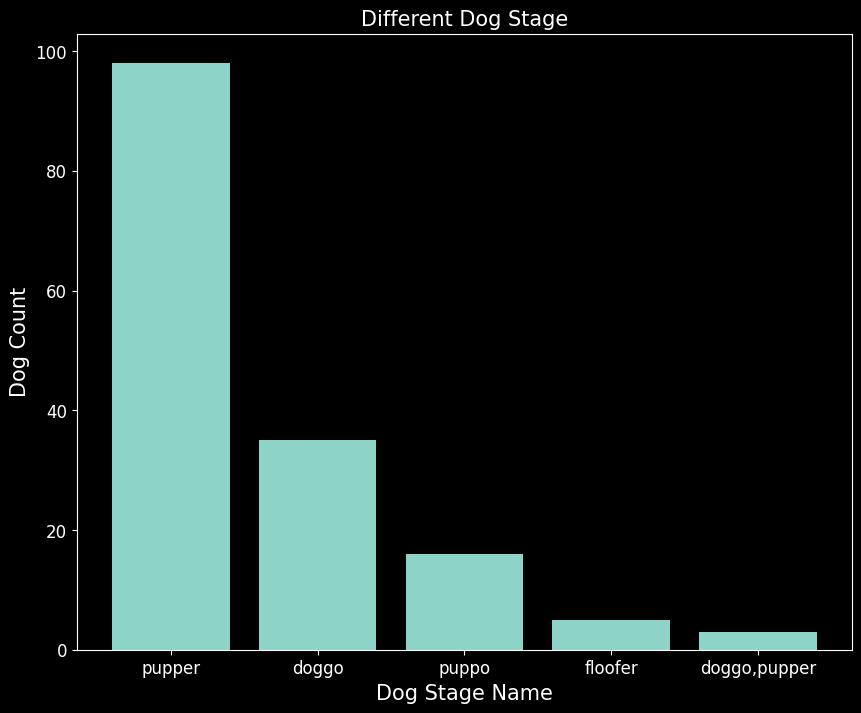

In [71]:
# series of dog stage
DogStagesCount = Dog_data.dog_stage.value_counts()

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting bar chart
plt.bar(DogStagesCount.index,DogStagesCount.values)

# setting labels and size
plt.title('Different Dog Stage',fontsize =15)
plt.xlabel('Dog Stage Name',fontsize=15)
plt.ylabel('Dog Count', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# view plot
plt.show()

We can see from the chart that the majority of the dogs posted on _WeRateDog_ twitter page are in their _**pupper**_ stage. If they are the most posted stage of a dog, that means they have the highest retweet count, right? Let's find out!

#### Most Retweeted Dog Stage

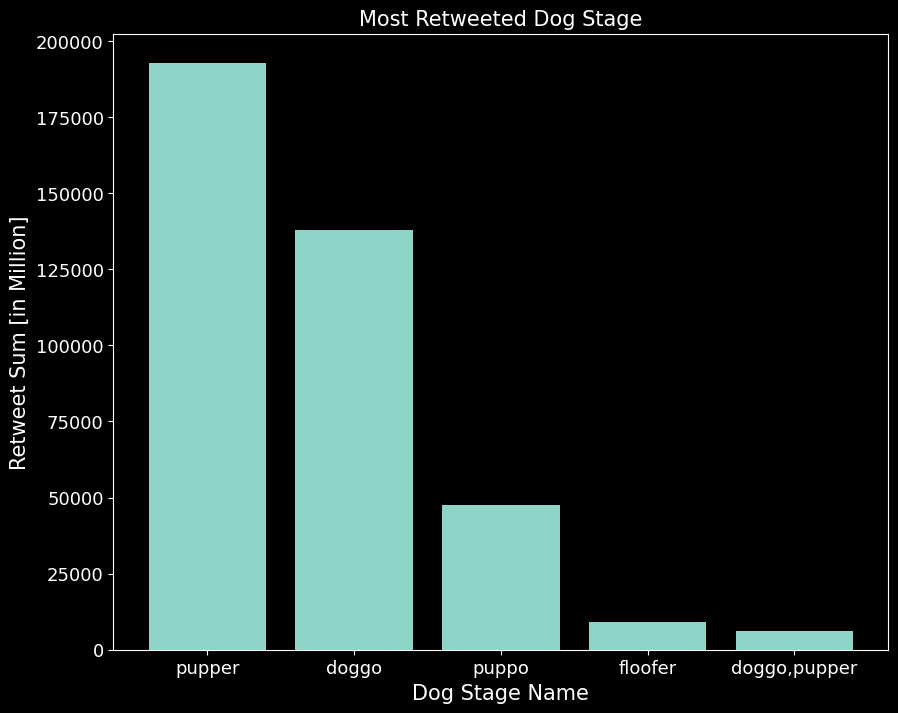

In [72]:
# series of retweet dog stage
RetwtDogStage = Dog_data.groupby('dog_stage')['retweet_count'].sum()
RetwtDogStage = RetwtDogStage.sort_values(ascending=False)

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting bar chart
plt.bar(RetwtDogStage.index, RetwtDogStage.values)

# setting labels and size
plt.title('Most Retweeted Dog Stage',fontsize =15)
plt.xlabel('Dog Stage Name',fontsize=15)
plt.ylabel('Retweet Sum [in Million]', fontsize =15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# view plot
plt.show()

Interesting! Our inference was correct. _**Pupper**_ stage has the most retweets. Let's look at the most predicted dog.

#### 15 Most Predicted Dog Breed in Algorithm 1

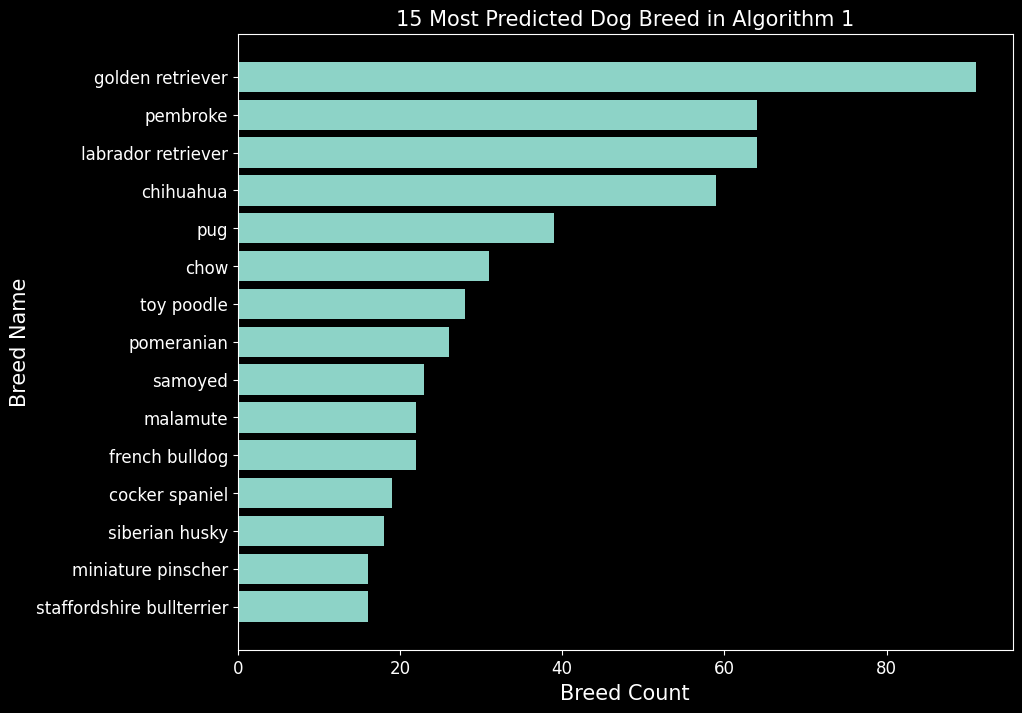

In [73]:
# dog breed series
MostPredictedBreed_1 = Dog_data.p1.value_counts()
# 15 top dog breed
MostPredictedBreed_1 = MostPredictedBreed_1.head(15).sort_values()

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting horizontal bar chart
plt.barh(MostPredictedBreed_1.index,MostPredictedBreed_1.values)

# setting labels and size
plt.title('15 Most Predicted Dog Breed in Algorithm 1',fontsize =15)
plt.xlabel('Breed Count',fontsize=15)
plt.ylabel('Breed Name', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# view plot
plt.show()

**Golden retriever** is the most predicted breed in algorithm 1.

#### 15 Most Predicted Dog Breed in Algorithm 2.

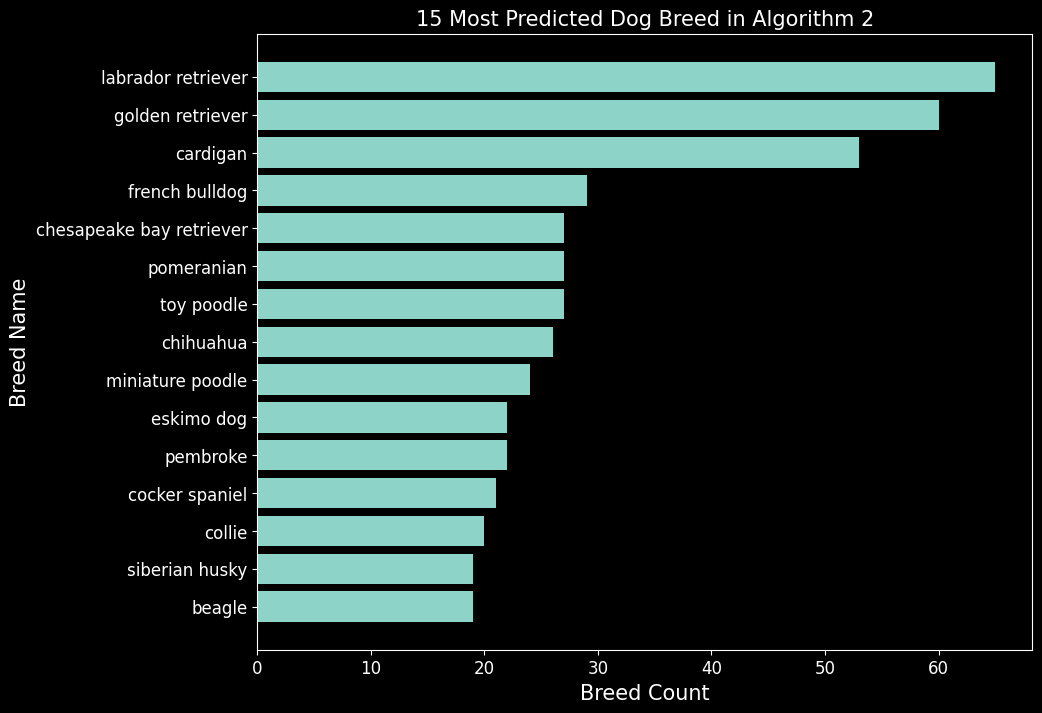

In [74]:
# dog breed series
MostPredictedBreed_2 = Dog_data.p2.value_counts()
# 15 top dog breed
MostPredictedBreed_2 = MostPredictedBreed_2.head(15).sort_values()

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting horizontal bar chart
plt.barh(MostPredictedBreed_2.index,MostPredictedBreed_2.values)

# setting labels and size
plt.title('15 Most Predicted Dog Breed in Algorithm 2',fontsize =15)
plt.xlabel('Breed Count',fontsize=15)
plt.ylabel('Breed Name', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# view plot
plt.show()

In algorithm 2, **Labrador retriever** is the most predicted dog breed followed by **Golden retriever**

#### 15 Most Predicted Dog Breed in Algorithm 3

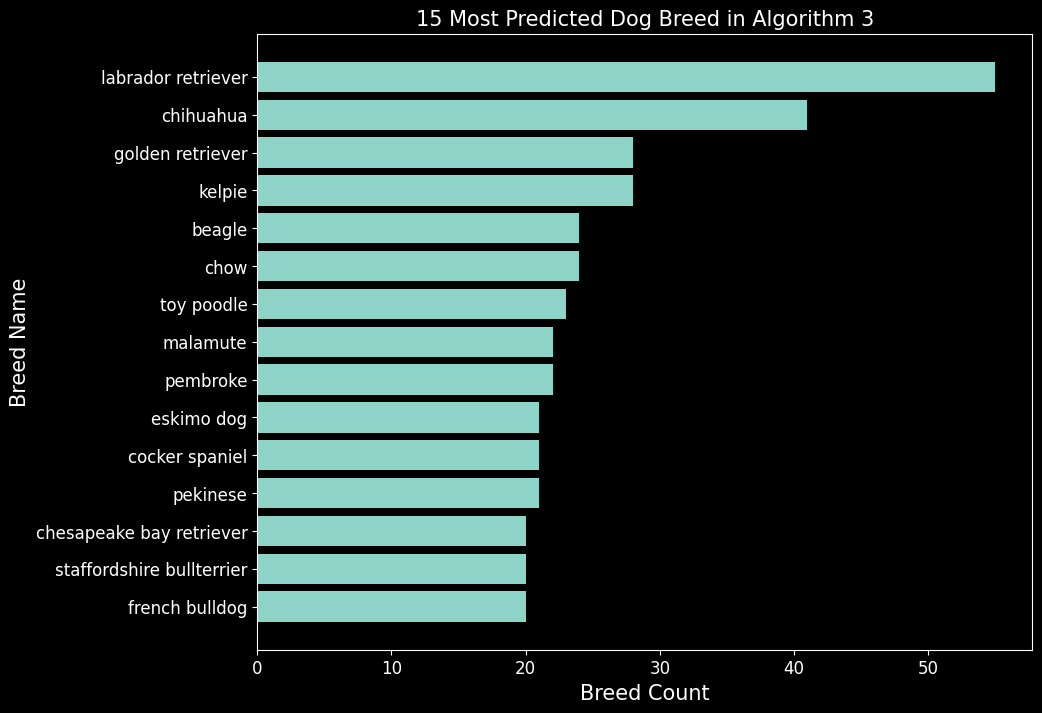

In [75]:
# dog breed series
MostPredictedBreed_3 = Dog_data.p3.value_counts()
# 15 top dog breed
MostPredictedBreed_3 = MostPredictedBreed_3.head(15).sort_values()

# setting plot with size
fig = plt.figure(figsize=(10,8))

# plotting horizontal bar chart
plt.barh(MostPredictedBreed_3.index,MostPredictedBreed_3.values)

# setting labels and size
plt.title('15 Most Predicted Dog Breed in Algorithm 3',fontsize =15)
plt.xlabel('Breed Count',fontsize=15)
plt.ylabel('Breed Name', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# view plot
plt.show()

_**Labrador retriever**_ is the most predicted dog breed in algorithm 3 followed by _**Chihuahua**_.

#### Relationship Between Favorite count and Retweet count

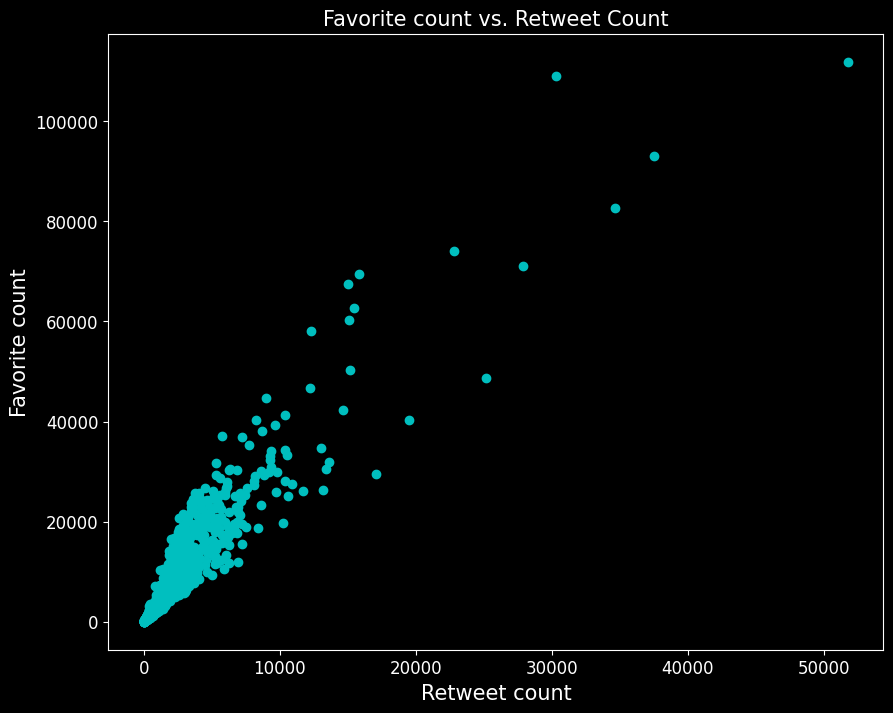

In [76]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(10,8))

# Create a scatter plot of duration versus year
x = Dog_data.retweet_count
y = Dog_data.favorite_count
plt.scatter(x,y,c='c')

# Create a title
plt.title('Favorite count vs. Retweet Count',fontsize =15)
plt.xlabel('Retweet count',fontsize=15)
plt.ylabel('Favorite count', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.show()

There is a positive relationship between favorite count and retweet count.

#### Relationship Between Rating and Retweet count  

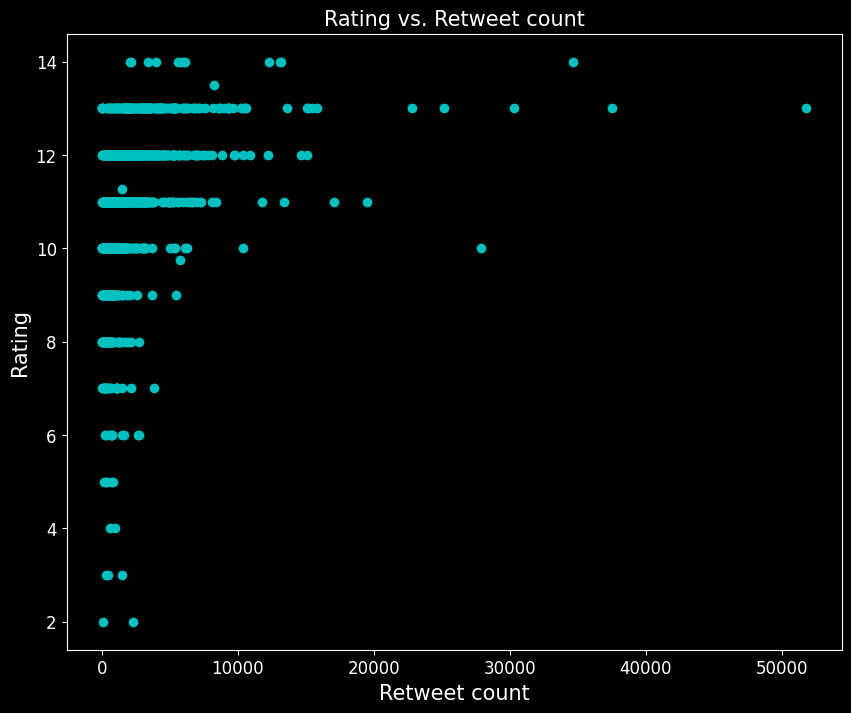

In [77]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(10,8))

# Create a scatter plot of duration versus year
x = Dog_data.retweet_count
y = Dog_data.rating_numerator
plt.scatter(x,y,c='c')

# Create a title
plt.title('Rating vs. Retweet count',fontsize =15)
plt.xlabel('Retweet count',fontsize=15)
plt.ylabel('Rating', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.show()

At least with the above plot we can say the number of retweets is not dependent on the rating. The highest rating has less than 10,000 retweet count compared to ratings below 12 which have over 10,000 retweets.

#### Relationship Between Rating and Favorite count

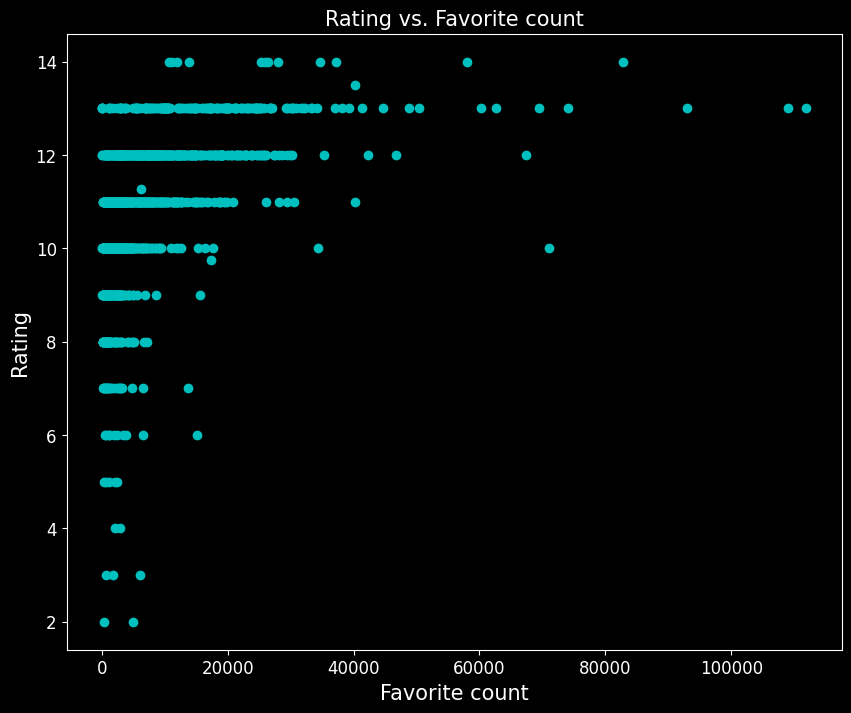

In [78]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(10,8))

# Create a scatter plot of duration versus year
x = Dog_data.favorite_count
y = Dog_data.rating_numerator
plt.scatter(x,y,c='c')

# Create a title
plt.title('Rating vs. Favorite count',fontsize =15)
plt.xlabel('Favorite count',fontsize=15)
plt.ylabel('Rating', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.show()

The above relationship is similar to the previous one. Favorite count of dog tweets is not dependent on the rating.

### Conclusion
The three data was gathered successfully, though some twitter data could not be accessed, probably because it was deleted. Three data was wrangled and merged to form a master dataset which was later used for analysis and visualization. Contained in the folder where you find this file are two reports, **wrangle_report & act_report**, that  briefly describes the wrangling efforts and  communicates all the insights and displays the visualization(s) produced from this wrangled data.